In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [26]:

# Load the Titanic dataset


titanic_df = pd.read_csv('Titanic-Dataset.csv')


In [27]:

# Select relevant features for prediction and clean the data
titanic_df = titanic_df[['Survived', 'Age', 'Fare', 'Sex', 'Pclass']]
titanic_df.dropna(inplace=True)


In [28]:

# Convert categorical variables to numerical
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 1, 'female': 0})


In [29]:

# Define the features and target variable
X = titanic_df[['Age', 'Fare', 'Sex', 'Pclass']]
y = titanic_df['Survived']


In [30]:

# Implementing linear regression without sklearn
def linear_regression(X, y):
    # Adding bias term to X
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Calculating the optimal weights using the normal equation
    weights = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)
    
    return weights


In [31]:

# Training the model
weights = linear_regression(X, y)
print("Weights (bias, age, fare, sex, pclass):", weights)


Weights (bias, age, fare, sex, pclass): [ 1.31690162e+00 -5.42560851e-03  6.80053306e-05 -4.78664588e-01
 -2.00417263e-01]


In [32]:

# Predicting survival using the trained model
def predict_survival(weights, age, fare, sex, pclass):
    prediction = weights[0] + weights[1]*age + weights[2]*fare + weights[3]*sex + weights[4]*pclass
    return 1 if prediction > 0.5 else 0


In [33]:

# Example prediction
example_age = 25
example_fare = 100
example_sex = 1  # 1 for male, 0 for female
example_pclass = 3

prediction = predict_survival(weights, example_age, example_fare, example_sex, example_pclass)
print(f"Prediction for a {example_age}-year-old male, in third class, with a fare of ${example_fare}: {'Survived' if prediction == 1 else 'Not Survived'}")


Prediction for a 25-year-old male, in third class, with a fare of $100: Not Survived


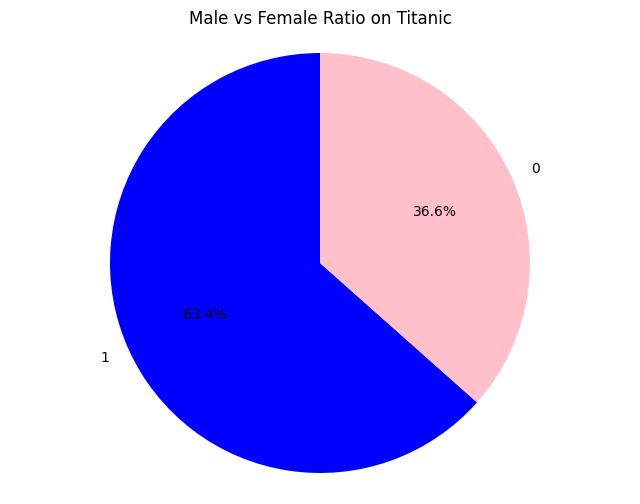

In [50]:
# Count the number of male and female passengers
sex_count = titanic_df['Sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%', colors=['blue', 'pink'], startangle=90)
plt.title('Male vs Female Ratio on Titanic')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

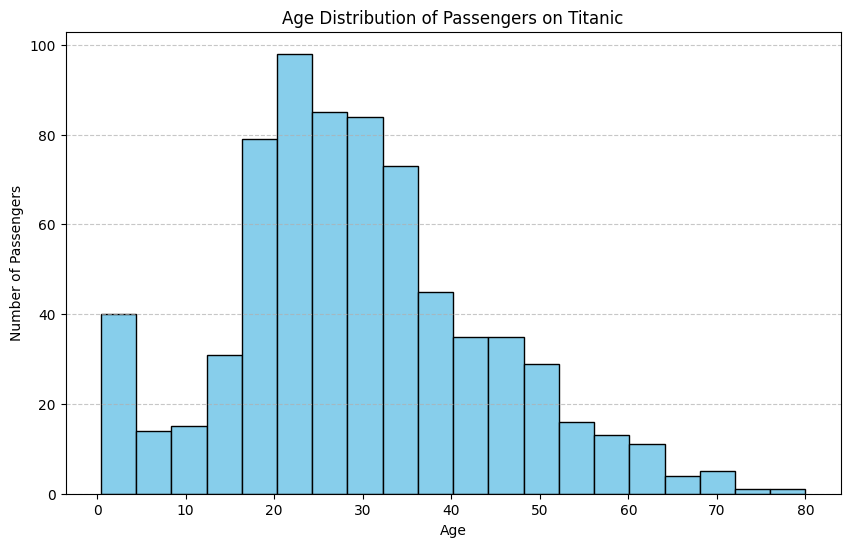

In [55]:
# Drop rows with missing age values
titanic_df.dropna(subset=['Age'], inplace=True)

# Create a histogram to visualize the age distribution
plt.figure(figsize=(10, 6))
plt.hist(titanic_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Passengers on Titanic')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
